### Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know 

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house. 

### Business Goal :

* Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* Determine the optimal value of lambda for ridge and lasso regression.
* This model will then be used by the management to understand how exactly the prices vary with the variables
* They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
* The model will be a good way for the management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the dimensions
data.shape

(1460, 81)

In [4]:
# Check for column details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking the summary statistics of the dataset
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 2: Data Cleaning

In [6]:
#Sum of null value
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
# Checking for percentage nulls
round(100*(data.isnull().sum()/len(data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [8]:
# There are multiple columns with high nulls, lets group them together
data.columns[data.isnull().any()] 

null = data.isnull().sum()/len(data)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [9]:
# Drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'columns becuase there are so many missing values 
# and id column is not required
# Drop one of those columns who have same lebelling in the independent variabls-'Condition1', 'Condition2',
# 'BsmtCond', 'BsmtFinType2', 'Heating', 'Functional', 'GarageQual', 'SaleType'
data = data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','Id', 'Condition1', 'Condition2', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Functional', 'GarageQual', 'SaleType'],axis=1)

In [10]:
# Drop the row of columns having <0-1% missing values
data = data[~data.MasVnrArea.isnull()]

In [11]:
# Drop the row of columns having <0-1% missing values
data = data[~data.MasVnrType.isnull()]

In [12]:
# Drop the row of columns having <0-1% missing values
data = data[~data.Electrical.isnull()]

In [13]:
# Drop the row of columns of GarageYrBlt variable
data = data[~data.GarageYrBlt.isnull()]

In [14]:
# Fill missing values either most occuring feature or zero
data['GarageType'] = data['GarageType'].fillna(0)
data['GarageFinish'] = data['GarageFinish'].fillna(0)
# data['GarageQual'] = data['GarageQual'].fillna(0)
data['GarageCond'] = data['GarageCond'].fillna(0)
data['BsmtExposure'] = data['BsmtExposure'].fillna("No")
# data['BsmtFinType2'] = data['BsmtFinType2'].fillna(0)
data['BsmtFinType1'] = data['BsmtFinType1'].fillna("Unf")
data['BsmtQual'] = data['BsmtQual'].fillna("TA")
# data['BsmtCond'] = data['BsmtCond'].fillna(0)

In [15]:
# Will check 'LotFrontage' column
data['LotFrontage'].describe()

count    1120.000000
mean       70.663393
std        24.277552
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
# for the LotFrontage column, we will impute the missing values with the median since the feature contains outliers
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [17]:
# checking for the presence of any more null values
data.isnull().values.any()

False

In [18]:
# check Null value
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
Length: 67, dtype: int64

#### Outlier Treatment

In [19]:
# Checking outliers at 25%,50%,75%,90%,95% and above

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,...,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,70.542336,10687.435036,6.181752,5.582482,1972.783942,1985.327007,109.076642,454.211679,48.418248,...,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,2007.811679,185194.797080
std,41.073531,21.950673,10228.507006,1.344236,1.081480,29.371056,20.452934,184.589326,458.985739,164.817484,...,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,1.331589,78899.705642
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7731.000000,5.000000,5.000000,1955.000000,1967.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133925.000000
50%,50.000000,70.000000,9591.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,399.500000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,2001.000000,2004.000000,171.750000,728.000000,0.000000,...,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000
90%,120.000000,92.000000,14573.300000,8.000000,7.000000,2006.000000,2006.000000,340.000000,1074.400000,127.100000,...,264.000000,130.000000,108.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,281383.900000
95%,160.000000,104.000000,17501.650000,8.000000,8.000000,2007.000000,2007.000000,461.750000,1275.650000,406.050000,...,341.100000,171.100000,180.000000,0.000000,166.650000,0.000000,0.000000,11.000000,2010.000000,334175.600000
99%,190.000000,134.930000,39410.900000,10.000000,9.000000,2009.000000,2009.000000,802.200000,1583.230000,849.680000,...,509.620000,282.930000,260.550000,168.000000,271.620000,0.000000,700.000000,12.000000,2010.000000,441940.910000


In [20]:
#type of each feature in data: int, float, object
types = data.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [21]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

int64      34
object     30
float64     3
Name: 0, dtype: int64

In [22]:
# Getting numerical variables
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [23]:
# Remove the outliers
num_cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
            'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
            'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 
            'SalePrice']

Q1 = data[num_cols].quantile(0.05)
Q3 = data[num_cols].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[num_cols] < (Q1 - 1.5 * IQR)) |(data[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

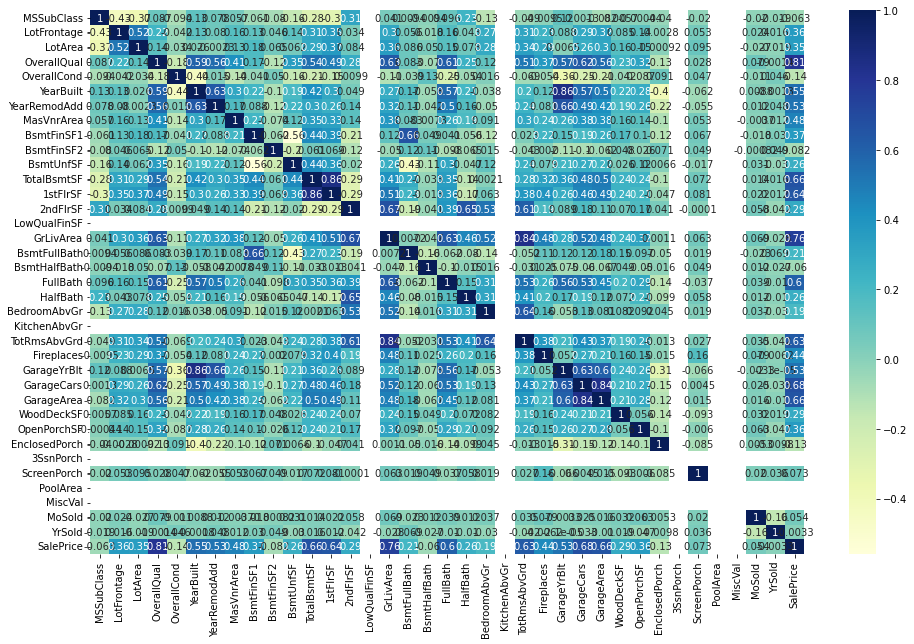

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Removing following columns which shows high correlation
    - TotRmsAbvGrd and GrLivArea show 84%
    - Garage Area and Garage Cars show 84%
    - GarageYrBlt and YearBuilt show 86%

Hence dropping TotRmsAbvGrd, Garage Cars and YearBuilt.

In [25]:
# Removing the highly correlated variables

data.drop(['TotRmsAbvGrd', 'GarageArea', 'YearBuilt'], axis = 1, inplace = True)

In [26]:
# Check the shape of the dataframe

data.shape

(1203, 64)

In [27]:
# Getting categorical variables
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageCond', 'PavedDrive', 'SaleCondition']


In [28]:
data['GarageCond'].value_counts()

TA    1162
Fa      28
Gd       7
Po       5
Ex       1
Name: GarageCond, dtype: int64

In [29]:
# Assigned ordered sequence values in categorical variables

data['d_GarageCond'] = data['GarageCond'].map({'TA': 4, 'Fa': 3, 'Gd': 2, 'Po': 1, 'Ex': 0 })
data['d_PavedDrive'] = data['PavedDrive'].map({'Y': 2, 'N': 1, 'P': 0})
data['d_Electrical'] = data['Electrical'].map({'SBrkr': 4, 'FuseA': 3, 'FuseF': 2, 'FuseP': 1, 'Mix': 0 })
data['d_CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})
data['d_ExterCond'] = data['ExterCond'].map({'TA': 3, 'Gd': 2, 'Fa': 1, 'Ex': 0})
data['d_RoofMatl'] = data['RoofMatl'].map({'CompShg': 3, 'Tar&Grv': 2, 'WdShake': 1, 'WdShngl': 0})
data['d_LandSlope'] = data['LandSlope'].map({'Gtl': 2, 'Mod': 1, 'Sev': 0})
data['d_Utilities'] = data['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
data['d_LandContour'] = data['LandContour'].map({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
data['d_Street'] = data['Street'].map({'Pave': 1, 'Grvl': 0})
data['d_LotShape'] = data['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
data['d_ExterQual'] = data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
data['d_BsmtQual'] = data['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_BsmtExposure'] = data['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
data['d_BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
data['d_HeatingQC'] = data['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_KitchenQual'] = data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
data['d_GarageFinish'] = data['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
data['d_BldgType'] = data['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
data['d_HouseStyle'] = data['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
data['d_LotConfig'] = data['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  })
data['d_MasVnrType'] = data['MasVnrType'].map({'BrkCmn': 4, 'BrkFace': 3, 'CBlock': 2, 'Stone': 1, 'None': 0 })
data['d_SaleCondition'] = data['SaleCondition'].map({'Normal': 6, 'Partial': 5, 'Abnorml': 4, 'Family': 3, 
                                                                   'Alloca': 2, 'AdjLand': 1, 'None': 0})
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,6,5,4,2,1,4,5,3,6
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,4,5,5,3,2,1,1,2,0,6
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,2,6,5,4,2,1,4,5,3,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,5,4,4,1,1,4,4,0,4
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,3,6,5,4,2,1,4,2,3,6


In [30]:
# drop the old columns from which the new columns were derived

data = data.drop(['GarageCond', 'PavedDrive', 'Electrical', 'CentralAir', 'ExterCond', 'RoofMatl', 'LandSlope', 'Utilities', 'LandContour', 'Street', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'GarageFinish', 'BldgType', 'HouseStyle', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,2003,Gable,VinylSd,...,1,6,5,4,2,1,4,5,3,6
1,20,RL,80.0,9600,Veenker,6,8,1976,Gable,MetalSd,...,4,5,5,3,2,1,1,2,0,6
2,60,RL,68.0,11250,CollgCr,7,5,2002,Gable,VinylSd,...,2,6,5,4,2,1,4,5,3,6
3,70,RL,60.0,9550,Crawfor,7,5,1970,Gable,Wd Sdng,...,1,5,4,4,1,1,4,4,0,4
4,60,RL,84.0,14260,NoRidge,8,5,2000,Gable,VinylSd,...,3,6,5,4,2,1,4,2,3,6


In [31]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(data['MSZoning'], prefix='MSZoning', drop_first = True)
data = pd.concat([data, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(data['Neighborhood'], prefix='Neighborhood', drop_first = True)
data = pd.concat([data, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(data['RoofStyle'], prefix='RoofStyle', drop_first = True)
data = pd.concat([data, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(data['Exterior1st'], prefix='Exterior1st', drop_first = True)
data = pd.concat([data, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
data = pd.concat([data, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(data['Foundation'], prefix='Foundation', drop_first = True)
data = pd.concat([data, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(data['GarageType'], prefix='GarageType', drop_first = True)
data = pd.concat([data, d_GarageType], axis = 1)

#housingInfo.head()

In [32]:
# drop the below columns as we now have new columns derived from these columns

data = data.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,1,0,0,0,1,0,0,0,0


In [33]:
# Check the shape of the dataframe

data.shape

(1203, 128)

## Step 3: Data Visualization 

<Figure size 1440x1080 with 0 Axes>

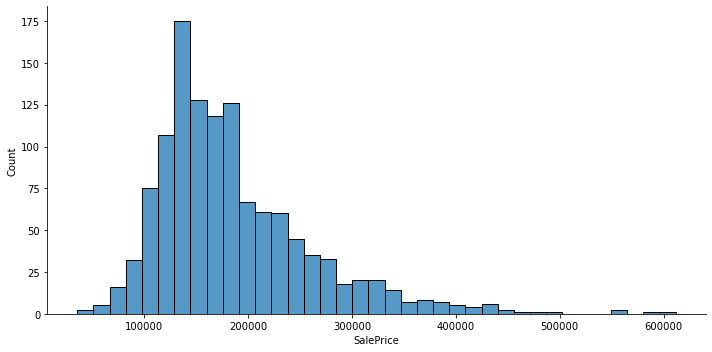

In [34]:
# Checking the distribution of target variable SalePrice
plt.figure(figsize=[20,15])
sns.displot(data['SalePrice'], aspect=2)
plt.show()

- Looking at the distribution, we can see that the distribution is towards the right (i.e. outliers on data with high Sales Price). This indicates the presence of outliers.

we will perform Log Transformation on "SalePrice" column. This will transform the variable and make it as normally distributed as possible.

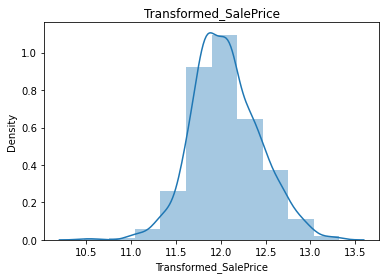

In [35]:
# Create Log Transformed in "SalePrice" column
data['Transformed_SalePrice'] = np.log(data['SalePrice'])

plt.title('Transformed_SalePrice')
sns.distplot(data['Transformed_SalePrice'], bins=10)
plt.show()

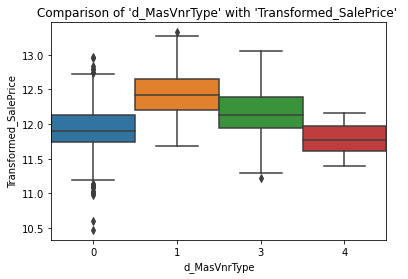

In [36]:
var = 'd_MasVnrType'
sns.boxplot(x=var, y='Transformed_SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'Transformed_SalePrice' ")
plt.show()

- Stone Masonry Veneer Type has higher median Sales Price compared to other

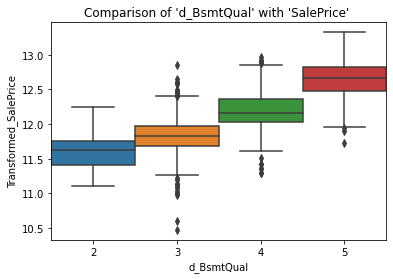

In [37]:
var = 'd_BsmtQual'
sns.boxplot(x=var, y='Transformed_SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

- As Basement quality increases from Fair to Excellent, we see a corresponding increase in SalePrice.

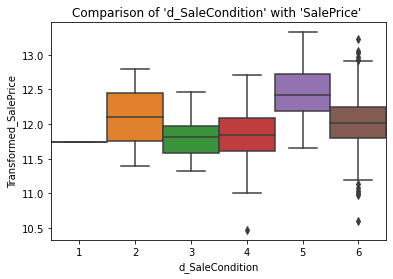

In [38]:
var = 'd_SaleCondition'
sns.boxplot(x=var, y='Transformed_SalePrice', data=data, width=1)
plt.title(f"Comparison of '{var}' with 'SalePrice' ")
plt.show()

- Houses that are partially completed have a higher median Saleprice compared to other categories. This might be because partially completed houses are usually new houses under construction.

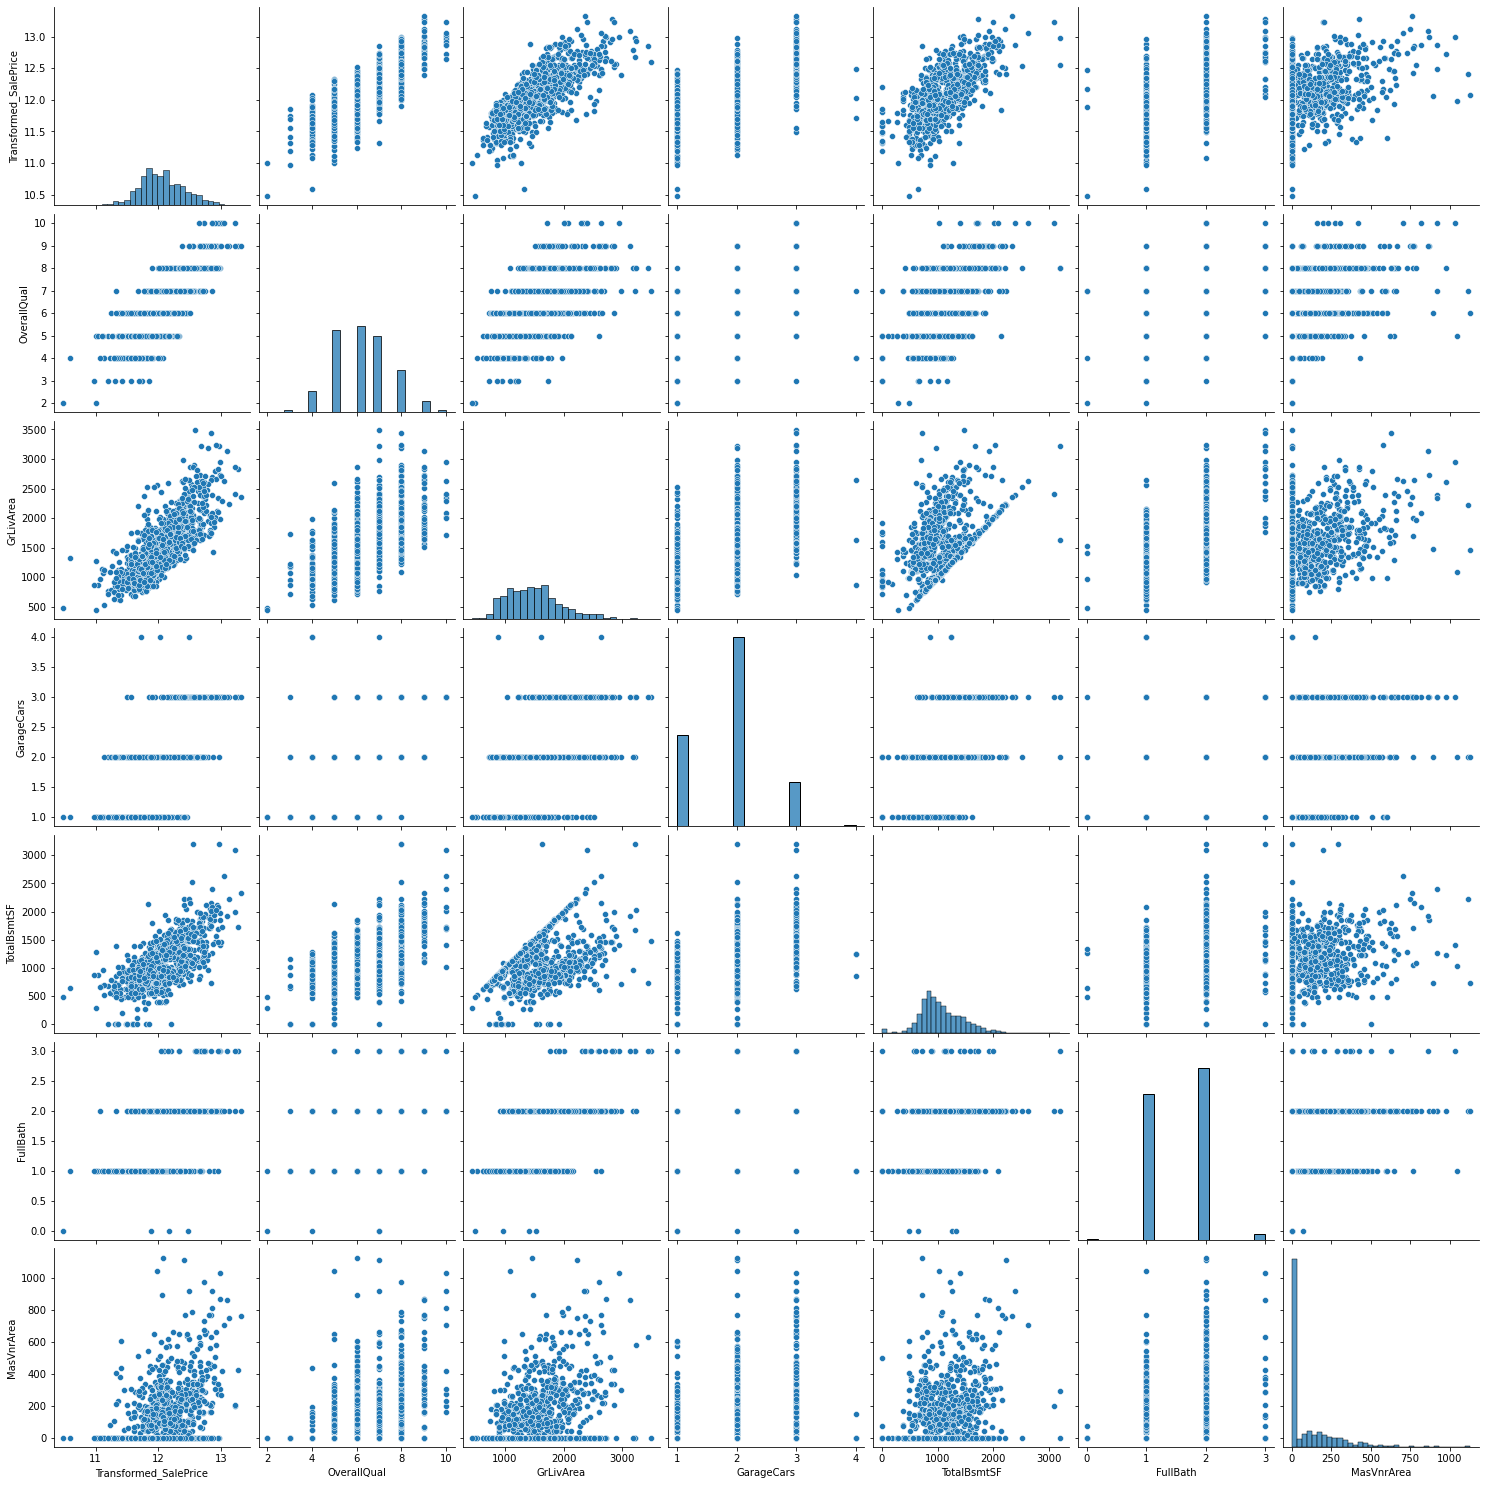

In [39]:
columns = ['Transformed_SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea']
sns.pairplot(data[columns], size=3)
plt.show()

From the pairplot, we can see few observations:

- TotalBasementSF and GrLivingArea are linearly correlated with SalePrice
- TotalBasementSF and GrLivingArea have a positive correlation
- Distribution of MasVnrArea is distributed to right

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

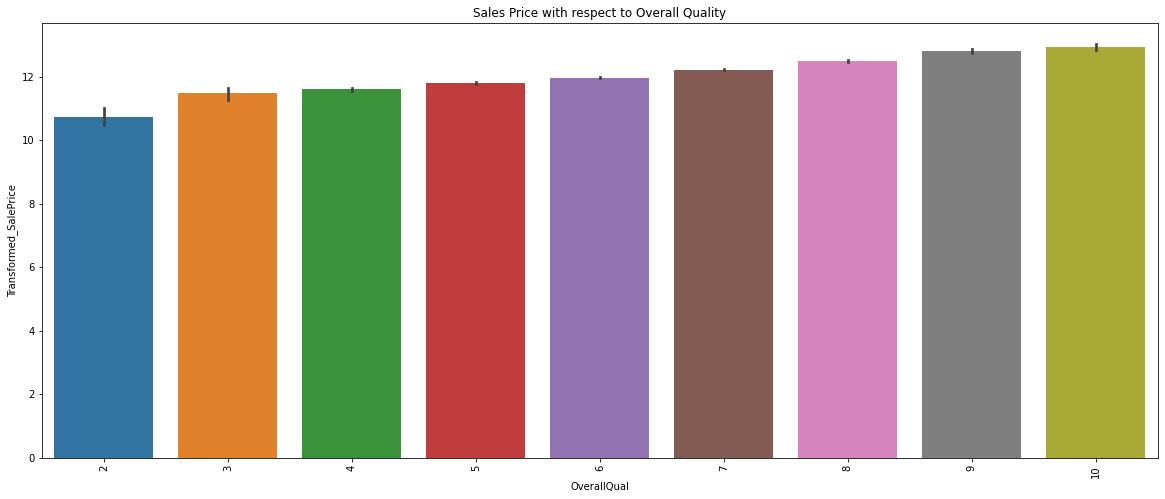

In [40]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="Transformed_SalePrice", data= data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

- Increase in the overall quality has a direct positive effect on the sale price

In [41]:
# Check the shape of the dataframe

data.shape

(1203, 129)

## Step 5: Train Test Split and Model Building
### 1 - Linear Regression and RFE

In [42]:
# Drop the 'LowQualFinSF','3SsnPorch','KitchenAbvGr','PoolArea','MiscVal' variables since they have only one value.
data = data.drop(['LowQualFinSF','3SsnPorch','KitchenAbvGr','PoolArea','MiscVal'],axis=1)

In [43]:
# Putting all feature variable to X

X = data.drop(['Transformed_SalePrice', 'SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,60,65.0,8450,7,5,2003,196.0,706,0,150,...,0,1,0,0,0,1,0,0,0,0
1,20,80.0,9600,6,8,1976,0.0,978,0,284,...,1,0,0,0,0,1,0,0,0,0
2,60,68.0,11250,7,5,2002,162.0,486,0,434,...,0,1,0,0,0,1,0,0,0,0
3,70,60.0,9550,7,5,1970,0.0,216,0,540,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,350.0,655,0,490,...,0,1,0,0,0,1,0,0,0,0


In [44]:
data['Transformed_SalePrice'].value_counts()

11.849398    18
11.813030    14
11.951180    14
12.154779    12
11.608236    11
             ..
11.421906     1
12.059803     1
12.832011     1
12.694653     1
11.901583     1
Name: Transformed_SalePrice, Length: 585, dtype: int64

In [45]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1459
Data columns (total 124 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass             1203 non-null   int64  
 1    LotFrontage            1203 non-null   float64
 2    LotArea                1203 non-null   int64  
 3    OverallQual            1203 non-null   int64  
 4    OverallCond            1203 non-null   int64  
 5    YearRemodAdd           1203 non-null   int64  
 6    MasVnrArea             1203 non-null   float64
 7    BsmtFinSF1             1203 non-null   int64  
 8    BsmtFinSF2             1203 non-null   int64  
 9    BsmtUnfSF              1203 non-null   int64  
 10   TotalBsmtSF            1203 non-null   int64  
 11   1stFlrSF               1203 non-null   int64  
 12   2ndFlrSF               1203 non-null   int64  
 13   GrLivArea              1203 non-null   int64  
 14   BsmtFullBath           1203 non-null  

In [46]:
# Putting response variable to y

y = data[['Transformed_SalePrice']]
y.head()

,Transformed_SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'd_GarageCond',
       'd_PavedDrive', 'd_Electrical', 'd_CentralAir', 'd_ExterCond',
       'd_RoofMatl', 'd_LandSlope', 'd_Utilities', 'd_LandContour', 'd_Street',
       'd_LotShape', 'd_ExterQual', 'd_BsmtQual', 'd_BsmtExposure',
       'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual', 'd_GarageFinish',
       'd_BldgType', 'd_HouseStyle', 'd_LotConfig', 'd_MasVnrType',
       'd_SaleCondition'],
      dtype='object')

In [49]:
##   Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

In [50]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']])

In [51]:
# Running RFE with the output number of the variable equal to 100

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step = 100)            
rfe = rfe.fit(X_train, y_train)

In [52]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 2),
 ('LotFrontage', False, 2),
 ('LotArea', False, 2),
 ('OverallQual', True, 1),
 ('OverallCond', False, 2),
 ('YearRemodAdd', False, 2),
 ('MasVnrArea', False, 2),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 2),
 ('BsmtHalfBath', False, 2),
 ('FullBath', False, 2),
 ('HalfBath', False, 2),
 ('BedroomAbvGr', False, 2),
 ('Fireplaces', False, 2),
 ('GarageYrBlt', False, 2),
 ('GarageCars', False, 2),
 ('WoodDeckSF', False, 2),
 ('OpenPorchSF', False, 2),
 ('EnclosedPorch', False, 2),
 ('ScreenPorch', False, 2),
 ('MoSold', False, 2),
 ('YrSold', False, 2),
 ('d_GarageCond', False, 2),
 ('d_PavedDrive', False, 2),
 ('d_Electrical', False, 2),
 ('d_CentralAir', False, 2),
 ('d_ExterCond', False, 2),
 ('d_RoofMatl', False, 2),
 ('d_LandSlope', False, 2),
 ('d_Utilities', True, 1),
 ('d_LandContour', False, 2),

In [53]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 40 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,OverallQual,True,1
1,BsmtFinSF1,True,1
2,BsmtFinSF2,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
...,...,...,...
56,GarageType_Attchd,True,1
57,GarageType_Basment,True,1
58,GarageType_BuiltIn,True,1
59,GarageType_CarPort,True,1


In [54]:
# Select the top 40 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'd_Utilities', 'd_Street',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Stone', 'Exter

In [55]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'd_GarageCond', 'd_PavedDrive', 'd_Electrical', 'd_CentralAir',
       'd_ExterCond', 'd_RoofMatl', 'd_LandSlope', 'd_LandContour',
       'd_LotShape', 'd_ExterQual', 'd_BsmtQual', 'd_BsmtExposure',
       'd_BsmtFinType1', 'd_HeatingQC', 'd_KitchenQual', 'd_GarageFinish',
       'd_BldgType', 'd_HouseStyle', 'd_LotConfig', 'd_MasVnrType',
       'd_SaleCondition', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_Veenker',
       'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng',
       'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_HdBoard', 'Exter

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
X_train_rfe = pd.DataFrame(X_train[col])

In [58]:
X_train_rfe.head()

,OverallQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,d_Utilities,d_Street,...,Exterior2nd_Stone,Exterior2nd_Stucco,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
1286,-0.161281,0.256117,0.257019,0.235968,0.628681,0.435426,-0.819636,-0.387713,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
863,-0.919931,1.580096,-0.308202,-1.289160,0.182698,-0.041959,-0.819636,-0.757727,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
730,1.356020,1.653269,-0.308202,-0.355638,1.290222,1.199242,-0.819636,0.204308,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1091,0.597370,0.121204,-0.308202,-1.086710,-1.175072,-1.431679,0.639396,-0.543941,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1225,-0.161281,0.114344,-0.308202,-1.106955,-1.204804,-0.068480,-0.819636,-0.778283,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [59]:
X_train_rfe.shape

(842, 61)

In [60]:
# predict
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9366468098140958

In [61]:
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-2.574818073868839e+22

- Since the Test R2 is too low, we will check for some alternate methods of Regression

In [62]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

[11.34858406]
[[-1.66047398e-04  7.36777669e-03  2.30310045e-02  6.52136591e-02
   3.87507253e-02  1.10963869e-02  1.04988281e-02  2.93770117e+11
   9.62667270e+10  2.98629895e+11 -2.71121744e+11  7.29504459e+11
   8.32758165e+11 -9.41193555e+11  5.86831570e-03  1.00326538e-03
   7.53784180e-03  9.21630859e-03  6.58798218e-03  1.44577026e-03
   2.15377808e-02  2.53372192e-02  5.14793396e-03  1.64146423e-02
   7.59124756e-03  1.52893066e-02  1.16348267e-03 -2.96401978e-03
   1.27029419e-03  6.25705719e-03 -1.58691406e-03  1.87749863e-02
   6.72531128e-03  1.07345581e-02  5.24139404e-03  3.93878411e+11
  -2.60925293e-03 -1.59742684e+11 -8.77380371e-04  3.95965576e-03
   1.89380646e-02  1.30748749e-02  1.13887787e-02  9.07802582e-03
   1.75495148e-02  3.69262695e-03 -2.13012695e-02  7.00378418e-03
   4.09698486e-03 -8.57925415e-03  6.28662109e-03  4.74017739e-01
   4.77041245e-01  4.39849854e-01  4.13656235e-01 -9.67483521e-02
  -9.30347443e-02 -5.08003235e-02 -8.02268982e-02 -8.47091675e

In [63]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=122)

In [64]:
lm.coef_.shape

(1, 122)

In [65]:
data_linear = pd.DataFrame(index=X_train.columns)
data_linear.rows = X_train.columns
data_linear['Linear'] = lm.coef_[0]
data_linear

,Linear
MSSubClass,-0.000166
LotFrontage,0.007368
LotArea,0.023031
OverallQual,0.065214
OverallCond,0.038751
...,...
GarageType_Attchd,0.118579
GarageType_Basment,0.109056
GarageType_BuiltIn,0.107330
GarageType_CarPort,0.098152


In [66]:

#np.sum(np.square(y_train - y_pred_train))

In [67]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))[0]
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))[0]
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8883190472797682
-1.1979653894487233e+23
13.126577540241158
5.960314072466644e+24
0.015589759548979997
1.6510565297691535e+22


### 2 - Redge Regression

In [68]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()


# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# list pf alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]
def test_alpha_ridge(a):
    
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_train, y_train)
    pred_test_ridge = model_ridge.predict(X_test)
    new_score = r2_score(y_test, pred_test_ridge)
    new_mse = mean_squared_error(y_test, pred_test_ridge)
    print ('ALPHA: {:.4f} R2 SCORE: {:.4f}% new_score: {:.1f}' .format(a, new_score, new_mse))

for alpha in alphas:
    test_alpha_ridge(alpha)    

ALPHA: 0.0001 R2 SCORE: 0.9134% new_score: 0.0
ALPHA: 0.0010 R2 SCORE: 0.9135% new_score: 0.0
ALPHA: 0.0100 R2 SCORE: 0.9138% new_score: 0.0
ALPHA: 0.1000 R2 SCORE: 0.9146% new_score: 0.0
ALPHA: 0.2000 R2 SCORE: 0.9147% new_score: 0.0
ALPHA: 0.3000 R2 SCORE: 0.9145% new_score: 0.0
ALPHA: 0.4000 R2 SCORE: 0.9142% new_score: 0.0
ALPHA: 0.5000 R2 SCORE: 0.9140% new_score: 0.0
ALPHA: 0.6000 R2 SCORE: 0.9138% new_score: 0.0
ALPHA: 0.7000 R2 SCORE: 0.9137% new_score: 0.0
ALPHA: 0.8000 R2 SCORE: 0.9135% new_score: 0.0
ALPHA: 0.9000 R2 SCORE: 0.9134% new_score: 0.0
ALPHA: 1.0000 R2 SCORE: 0.9133% new_score: 0.0
ALPHA: 2.0000 R2 SCORE: 0.9129% new_score: 0.0
ALPHA: 3.0000 R2 SCORE: 0.9128% new_score: 0.0
ALPHA: 4.0000 R2 SCORE: 0.9128% new_score: 0.0
ALPHA: 5.0000 R2 SCORE: 0.9128% new_score: 0.0
ALPHA: 6.0000 R2 SCORE: 0.9129% new_score: 0.0
ALPHA: 7.0000 R2 SCORE: 0.9129% new_score: 0.0
ALPHA: 8.0000 R2 SCORE: 0.9129% new_score: 0.0
ALPHA: 9.0000 R2 SCORE: 0.9130% new_score: 0.0
ALPHA: 10.000

In [70]:
print(ridge_model_cv.best_params_)

print(ridge_model_cv.best_score_)

{'alpha': 10.0}
-0.08260527901909498


#### Optimim value of alpha is 10

In [71]:
alpha = 10
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_


array([[ 0.00050652,  0.00796673,  0.02109225,  0.07621889,  0.04046584,
         0.01327971,  0.01082601,  0.03074338,  0.00163655,  0.00268189,
         0.03684664,  0.04093784,  0.03783343,  0.0652049 ,  0.00525387,
         0.00261096,  0.0097109 ,  0.01172459,  0.00388217,  0.00407307,
         0.01484579,  0.02729658,  0.00494658,  0.01189556,  0.00833598,
         0.01339895,  0.00134556, -0.00298898,  0.00132436,  0.00450672,
        -0.00244689,  0.0190801 ,  0.00854495,  0.01056306,  0.00596749,
         0.        , -0.00403634,  0.        , -0.00089138,  0.00995309,
         0.02445714,  0.01250345,  0.01322609,  0.00712494,  0.01537705,
         0.00465745, -0.01659687,  0.00355686,  0.00310781, -0.00765506,
         0.00968676,  0.04627832,  0.0278831 ,  0.0360853 , -0.01410838,
        -0.00104426,  0.00142079,  0.02640339,  0.0121486 , -0.01670441,
         0.08047593, -0.03531027, -0.02449459, -0.04027577, -0.05360067,
        -0.01783536, -0.02183596,  0.00867367, -0.0

In [72]:
ridge.coef_


array([[ 0.00050652,  0.00796673,  0.02109225,  0.07621889,  0.04046584,
         0.01327971,  0.01082601,  0.03074338,  0.00163655,  0.00268189,
         0.03684664,  0.04093784,  0.03783343,  0.0652049 ,  0.00525387,
         0.00261096,  0.0097109 ,  0.01172459,  0.00388217,  0.00407307,
         0.01484579,  0.02729658,  0.00494658,  0.01189556,  0.00833598,
         0.01339895,  0.00134556, -0.00298898,  0.00132436,  0.00450672,
        -0.00244689,  0.0190801 ,  0.00854495,  0.01056306,  0.00596749,
         0.        , -0.00403634,  0.        , -0.00089138,  0.00995309,
         0.02445714,  0.01250345,  0.01322609,  0.00712494,  0.01537705,
         0.00465745, -0.01659687,  0.00355686,  0.00310781, -0.00765506,
         0.00968676,  0.04627832,  0.0278831 ,  0.0360853 , -0.01410838,
        -0.00104426,  0.00142079,  0.02640339,  0.0121486 , -0.01670441,
         0.08047593, -0.03531027, -0.02449459, -0.04027577, -0.05360067,
        -0.01783536, -0.02183596,  0.00867367, -0.0

In [73]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=122)

In [74]:
ridge.coef_.size

122

In [75]:
ridge.coef_

array([[ 0.00050652,  0.00796673,  0.02109225,  0.07621889,  0.04046584,
         0.01327971,  0.01082601,  0.03074338,  0.00163655,  0.00268189,
         0.03684664,  0.04093784,  0.03783343,  0.0652049 ,  0.00525387,
         0.00261096,  0.0097109 ,  0.01172459,  0.00388217,  0.00407307,
         0.01484579,  0.02729658,  0.00494658,  0.01189556,  0.00833598,
         0.01339895,  0.00134556, -0.00298898,  0.00132436,  0.00450672,
        -0.00244689,  0.0190801 ,  0.00854495,  0.01056306,  0.00596749,
         0.        , -0.00403634,  0.        , -0.00089138,  0.00995309,
         0.02445714,  0.01250345,  0.01322609,  0.00712494,  0.01537705,
         0.00465745, -0.01659687,  0.00355686,  0.00310781, -0.00765506,
         0.00968676,  0.04627832,  0.0278831 ,  0.0360853 , -0.01410838,
        -0.00104426,  0.00142079,  0.02640339,  0.0121486 , -0.01670441,
         0.08047593, -0.03531027, -0.02449459, -0.04027577, -0.05360067,
        -0.01783536, -0.02183596,  0.00867367, -0.0

In [76]:
data_ridge = pd.DataFrame(index=X_train.columns)
# data_ridge.rows = X_train.columns
data_ridge['Ridge'] = ridge.coef_[0]
# data_ridge.head(10)

In [77]:
data_ridge

,Ridge
MSSubClass,0.000507
LotFrontage,0.007967
LotArea,0.021092
OverallQual,0.076219
OverallCond,0.040466
...,...
GarageType_Attchd,0.026131
GarageType_Basment,0.005792
GarageType_BuiltIn,0.017289
GarageType_CarPort,-0.038106


In [78]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric2.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train - y_pred_train))[0]
print(rss_train_ridge)
metric2.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test- y_pred_test))[0]
print(rss_test_ridge)
metric2.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

0.9287469071138366
0.9129819435129928
8.37483228760809
4.329465201635581
0.009946356636114121
0.011992978397882496


In [79]:
# Double alpha value
alpha = 20
ridge_double = Ridge(alpha=alpha)
ridge_double.fit(X_train, y_train)
ridge_double.coef_

array([[ 1.01407181e-05,  8.07062290e-03,  2.08287791e-02,
         7.63132539e-02,  3.94597730e-02,  1.37036725e-02,
         1.18437127e-02,  3.02652964e-02,  1.27704973e-03,
         2.71830300e-03,  3.62410756e-02,  4.13603219e-02,
         3.67356930e-02,  6.45610961e-02,  5.64407235e-03,
         2.68863475e-03,  1.09839608e-02,  1.26037267e-02,
         3.65800810e-03,  5.68990761e-03,  1.39380479e-02,
         2.71550555e-02,  4.53577407e-03,  1.14076021e-02,
         8.20819959e-03,  1.32835362e-02,  1.67386172e-03,
        -2.91781744e-03,  1.51611724e-03,  4.70227351e-03,
        -1.71992107e-03,  1.89291004e-02,  8.03403486e-03,
         1.03482400e-02,  5.61672011e-03,  0.00000000e+00,
        -4.66432908e-03,  0.00000000e+00, -1.12407285e-03,
         1.22580608e-02,  2.50543867e-02,  1.23268253e-02,
         1.33048450e-02,  7.44147418e-03,  1.58722915e-02,
         5.11609188e-03, -1.48366700e-02,  3.15197878e-03,
         2.81032932e-03, -8.48374178e-03,  9.60247692e-0

In [80]:
# Double alpha value
data_ridge_double = pd.DataFrame(index=X_train.columns)
# data_ridge.rows = X_train.columns
data_ridge_double['Ridge Double'] = ridge_double.coef_[0]
# data_ridge.head(10)
data_ridge_double

,Ridge Double
MSSubClass,0.000010
LotFrontage,0.008071
LotArea,0.020829
OverallQual,0.076313
OverallCond,0.039460
...,...
GarageType_Attchd,0.019166
GarageType_Basment,0.002413
GarageType_BuiltIn,0.011620
GarageType_CarPort,-0.022029


In [81]:
# comparison ridge coefficients when alpha=10 and alpha=20
comparison_ridge_coef = pd.DataFrame(index=X_train.columns)
comparison_ridge_coef['Ridge'] = ridge.coef_[0]
comparison_ridge_coef['Ridge Double'] = ridge_double.coef_[0]
comparison_ridge_coef.head(10)

,Ridge,Ridge Double
MSSubClass,0.000507,0.000010
LotFrontage,0.007967,0.008071
LotArea,0.021092,0.020829
OverallQual,0.076219,0.076313
OverallCond,0.040466,0.039460
YearRemodAdd,0.013280,0.013704
MasVnrArea,0.010826,0.011844
BsmtFinSF1,0.030743,0.030265
BsmtFinSF2,0.001637,0.001277
BsmtUnfSF,0.002682,0.002718


In [82]:
# Most important predictor variables after the change is implemented
data_ridge_double.sort_values(by='Ridge Double', ascending=False).head(10)

,Ridge Double
OverallQual,0.076313
GrLivArea,0.064561
Neighborhood_Crawfor,0.063934
Neighborhood_StoneBr,0.060953
1stFlrSF,0.041360
OverallCond,0.039460
2ndFlrSF,0.036736
TotalBsmtSF,0.036241
Exterior1st_BrkFace,0.036050
Neighborhood_NridgHt,0.034937


In [83]:
# Double alpha value

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2_double = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print(r2_train_ridge)
metric2_double.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print(r2_test_ridge)
metric2_double.append(r2_test_ridge)

rss_train_ridge = np.sum(np.square(y_train - y_pred_train))[0]
print(rss_train_ridge)
metric2_double.append(rss_train_ridge)

rss_test_ridge = np.sum(np.square(y_test- y_pred_test))[0]
print(rss_test_ridge)
metric2_double.append(rss_test_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print(mse_train_ridge)
metric2_double.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print(mse_test_ridge)
metric2_double.append(mse_test_ridge**0.5)

0.9287469071138366
0.9129819435129928
8.37483228760809
4.329465201635581
0.009946356636114121
0.011992978397882496


In [84]:
# Comparison of metrics such as R2 score, RSS and RMSE when alpha=10 and alpha=20
Table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}
df_metric = pd.DataFrame(Table, columns = ['Metric'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_metric_double = pd.Series(metric2_double, name = 'Double Ridge Regression')
rg_metric_comparison = pd.concat([df_metric, rg_metric, rg_metric_double], axis = 1)
rg_metric_comparison

,Metric,Ridge Regression,Double Ridge Regression
0,R2 Score (Train),0.928747,0.928747
1,R2 Score (Test),0.912982,0.912982
2,RSS (Train),8.374832,8.374832
3,RSS (Test),4.329465,4.329465
4,MSE (Train),0.099731,0.099731
5,MSE (Test),0.109512,0.109512


### 3 - Lasso Regression

In [85]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# list pf alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]
def test_alpha_lasso(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train)
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print ('ALPHA: {:.4f} R2 SCORE: {:.4f}% new_score: {:.1f}' .format(a, new_score, new_mse))

for alpha in alphas:
    test_alpha_lasso(alpha)

ALPHA: 0.0001 R2 SCORE: 0.9169% new_score: 0.0
ALPHA: 0.0010 R2 SCORE: 0.9131% new_score: 0.0
ALPHA: 0.0100 R2 SCORE: 0.8957% new_score: 0.0
ALPHA: 0.1000 R2 SCORE: 0.7273% new_score: 0.0
ALPHA: 0.2000 R2 SCORE: 0.4247% new_score: 0.1
ALPHA: 0.3000 R2 SCORE: 0.0338% new_score: 0.1
ALPHA: 0.4000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.5000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.6000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.7000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.8000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.9000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 1.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 2.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 3.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 4.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 5.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 6.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 7.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 8.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 9.0000 R2 SCORE: -0.0006% new_score: 0.

In [87]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.001}
-0.08307211947928791


#### The optimum value of alpha is 0.001

In [88]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [89]:
lasso.coef_

array([-0.        ,  0.00714803,  0.02009706,  0.08174736,  0.03798712,
        0.01428824,  0.00845241,  0.0273036 ,  0.        , -0.        ,
        0.03668588,  0.00630227,  0.        ,  0.11624593,  0.00404569,
        0.00177054,  0.00583508,  0.00835372,  0.00148519,  0.00447422,
        0.01353817,  0.02760514,  0.00362044,  0.0099439 ,  0.00677678,
        0.01244624,  0.0009643 , -0.00152734,  0.00131958,  0.00340827,
       -0.        ,  0.01783024,  0.0063846 ,  0.00932999,  0.00351877,
        0.        , -0.00140207,  0.        , -0.00097852,  0.01282958,
        0.02417703,  0.01380722,  0.01274739,  0.00966796,  0.01446408,
        0.00509119, -0.01673937,  0.00034384,  0.00080665, -0.00486113,
        0.00930977,  0.0368907 ,  0.        ,  0.01825071, -0.02600625,
        0.        ,  0.        ,  0.00707141,  0.        , -0.        ,
        0.08789934, -0.009776  , -0.        , -0.00249276, -0.        ,
       -0.        , -0.        ,  0.        , -0.00115761,  0.  

In [90]:
data_lasso = pd.DataFrame(index=X_train.columns)
# data_lasso.rows = X_train.columns
data_lasso['Lasso'] = lasso.coef_
# data_lasso
data_lasso.head(20)

,Lasso
MSSubClass,-0.000000
LotFrontage,0.007148
LotArea,0.020097
OverallQual,0.081747
OverallCond,0.037987
YearRemodAdd,0.014288
MasVnrArea,0.008452
BsmtFinSF1,0.027304
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000


In [91]:
#np.sum(np.square(y_train - y_pred_train))
y_pred_train

array([[11.93367943],
       [11.79337639],
       [12.41173111],
       [12.01568547],
       [11.9027398 ],
       [12.13934922],
       [12.30986686],
       [12.75549887],
       [12.09830304],
       [12.23222751],
       [11.94667356],
       [12.25160594],
       [12.29421553],
       [11.92925542],
       [11.59656401],
       [11.88758867],
       [12.70080583],
       [11.9743721 ],
       [12.32593404],
       [11.85010083],
       [12.2336516 ],
       [11.81369662],
       [11.8294224 ],
       [11.94125084],
       [12.04822696],
       [11.91852419],
       [12.05727393],
       [11.87084832],
       [12.82615623],
       [11.36410936],
       [12.37630851],
       [11.68912261],
       [12.319914  ],
       [11.89061274],
       [12.61266131],
       [12.17369291],
       [12.11999325],
       [12.56477444],
       [12.33412118],
       [11.2596664 ],
       [12.14304028],
       [12.1398689 ],
       [12.06600925],
       [12.19625901],
       [12.02763378],
       [11

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train.squeeze() - y_pred_train))
print(rss_train_lasso)
metric3.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test.squeeze() - y_pred_test))
print(rss_test_lasso)
metric3.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

0.9238353114670431
0.9131342142244069
8.952123576172333
4.321889179222417
0.010631975743672605
0.011971992186211682


In [93]:
# Double alpha value
alpha = 0.002
lasso_double = Lasso(alpha=alpha)
lasso_double.fit(X_train, y_train)
lasso_double.coef_

array([-0.00000000e+00,  7.62721325e-03,  1.92732458e-02,  8.78503855e-02,
        3.44273331e-02,  1.47543996e-02,  8.29016194e-03,  2.88947969e-02,
        0.00000000e+00, -0.00000000e+00,  3.82876568e-02,  6.47264449e-03,
        0.00000000e+00,  1.15658521e-01,  2.09970865e-03,  1.95359091e-05,
        5.58707742e-03,  7.42291149e-03,  0.00000000e+00,  5.84668753e-03,
        1.19104682e-02,  2.70805447e-02,  1.65019578e-03,  9.60633761e-03,
        4.53950782e-03,  1.05038547e-02,  9.45746776e-04, -1.00905056e-03,
        9.73398649e-04,  2.90403319e-03,  0.00000000e+00,  1.87171682e-02,
        4.18978272e-03,  9.60107932e-03,  5.51898707e-04,  0.00000000e+00,
       -5.11384753e-04,  0.00000000e+00, -1.27002574e-03,  1.62099698e-02,
        2.64441062e-02,  1.19442265e-02,  1.22618429e-02,  1.04327076e-02,
        1.52345998e-02,  5.91705787e-03, -1.30959401e-02,  0.00000000e+00,
        0.00000000e+00, -4.95522063e-03,  8.20542302e-03,  0.00000000e+00,
        0.00000000e+00,  

In [94]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd'],
      dtype='object', length=122)

In [95]:
# Double alpha value
data_lasso_double = pd.DataFrame(index=X_train.columns)
# data_ridge.rows = X_train.columns
data_lasso_double['Lasso Double'] = lasso_double.coef_[0]
# data_ridge.head(10)
data_lasso_double

,Lasso Double
MSSubClass,-0.0
LotFrontage,-0.0
LotArea,-0.0
OverallQual,-0.0
OverallCond,-0.0
...,...
GarageType_Attchd,-0.0
GarageType_Basment,-0.0
GarageType_BuiltIn,-0.0
GarageType_CarPort,-0.0


In [96]:
# Most important predictor variables after the change is implemented
data_lasso_double.sort_values(by='Lasso Double', ascending=False).head(10)

,Lasso Double
MSSubClass,-0.0
Exterior1st_Plywood,-0.0
Exterior1st_ImStucc,-0.0
Exterior1st_HdBoard,-0.0
Exterior1st_CemntBd,-0.0
Exterior1st_CBlock,-0.0
Exterior1st_BrkFace,-0.0
Exterior1st_BrkComm,-0.0
RoofStyle_Shed,-0.0
RoofStyle_Mansard,-0.0


In [97]:
# comparison lasso coefficients when alpha=0.001 and alpha=0.002
comparison_lasso_coef = pd.DataFrame(index=X_train.columns)
comparison_lasso_coef['Lasso'] = lasso.coef_[0]
comparison_lasso_coef['Lasso Double'] = lasso_double.coef_[0]
comparison_lasso_coef

,Lasso,Lasso Double
MSSubClass,-0.0,-0.0
LotFrontage,-0.0,-0.0
LotArea,-0.0,-0.0
OverallQual,-0.0,-0.0
OverallCond,-0.0,-0.0
...,...,...
GarageType_Attchd,-0.0,-0.0
GarageType_Basment,-0.0,-0.0
GarageType_BuiltIn,-0.0,-0.0
GarageType_CarPort,-0.0,-0.0


In [98]:
# Double alpha value

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3_double = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric3_double.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric3_double.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train.squeeze() - y_pred_train))
print(rss_train_lasso)
metric3_double.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test.squeeze() - y_pred_test))
print(rss_test_lasso)
metric3_double.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric3_double.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric3_double.append(mse_test_lasso**0.5)

0.9238353114670431
0.9131342142244069
8.952123576172333
4.321889179222417
0.010631975743672605
0.011971992186211682


In [99]:
# Comparison of metrics such as R2 score, RSS and RMSE when alpha=0.001 and alpha=0.002
Table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}
df_metric = pd.DataFrame(Table, columns = ['Metric'])
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')
lasso_metric_double = pd.Series(metric3_double, name = 'Double Lasso Regression')
lasso_metric_comparison = pd.concat([df_metric, lasso_metric, lasso_metric_double], axis = 1)
lasso_metric_comparison

,Metric,Lasso Regression,Double Lasso Regression
0,R2 Score (Train),0.923835,0.923835
1,R2 Score (Test),0.913134,0.913134
2,RSS (Train),8.952124,8.952124
3,RSS (Test),4.321889,4.321889
4,MSE (Train),0.103111,0.103111
5,MSE (Test),0.109417,0.109417


In [100]:
# Comparison of metrics such as R2 score, RSS and RMSE when alpha=0.001 and alpha=0.002
Table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}
df_metric = pd.DataFrame(Table, columns = ['Metric'])

lr_metric = pd.Series(metric, name = 'Linear Regression')
ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')
lasso_metric_double = pd.Series(metric3_double, name = 'Double Lasso Regression')
lasso_metric_comparison = pd.concat([df_metric, lr_metric, ridge_metric, lasso_metric, lasso_metric_double], axis = 1)
lasso_metric_comparison

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Lasso Regression
0,R2 Score (Train),8.883190e-01,0.928747,0.923835,0.923835
1,R2 Score (Test),-1.197965e+23,0.912982,0.913134,0.913134
2,RSS (Train),1.312658e+01,8.374832,8.952124,8.952124
3,RSS (Test),5.960314e+24,4.329465,4.321889,4.321889
4,MSE (Train),1.248590e-01,0.099731,0.103111,0.103111
5,MSE (Test),1.284934e+11,0.109512,0.109417,0.109417


## Step 6: Model Evaluation

### 1. Ridge Regression

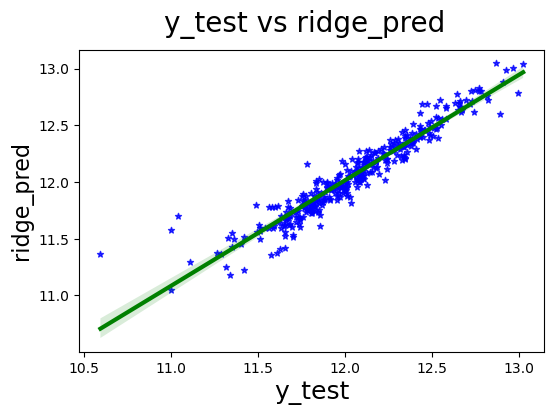

In [101]:
ridge_pred = ridge.predict(X_test)
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
sns.regplot(x=y_test,y=ridge_pred, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_test vs ridge_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

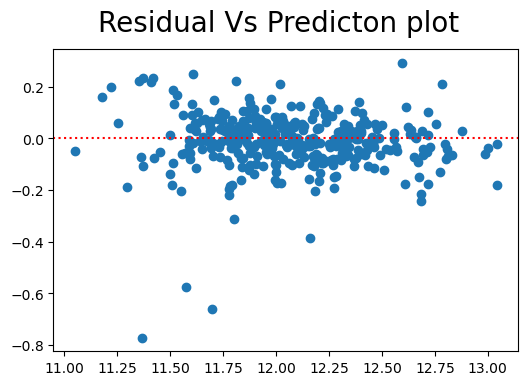

In [102]:
# Plotting Residual Vs Predicton plot for ridge regression.
y_res_rid = y_test - ridge_pred
fig = plt.figure(dpi=100)
plt.scatter(ridge_pred, y_res_rid)
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('Residual Vs Predicton plot', fontsize=20)           
plt.show()

- Residuals are uniformly distributed y=0

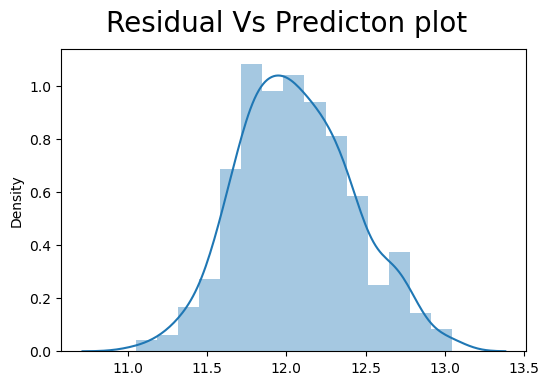

In [103]:
# Plotting Distribution of error for ridge regression.
fig = plt.figure(dpi=100)
P1 = sns.distplot(ridge_pred, kde=True)
fig.suptitle('Residual Vs Predicton plot', fontsize=20) 
plt.show()

### 2. Lasso Regression

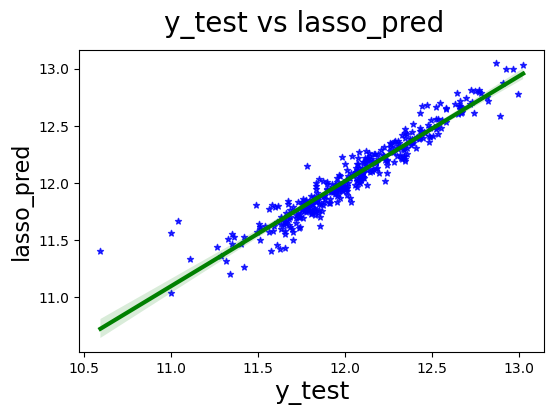

In [104]:
lasso_pred = lasso.predict(X_test)
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
sns.regplot(x=y_test,y=lasso_pred, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_test vs lasso_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

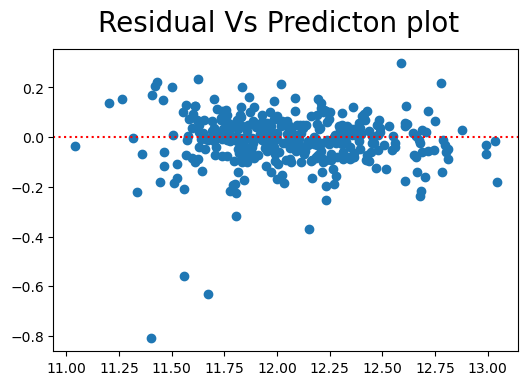

In [105]:
# Plotting Residual Vs Predicton plot for lasso regression.
y_res_lasso = y_test.squeeze() - lasso_pred
fig = plt.figure(dpi=100)
plt.scatter(lasso_pred, y_res_lasso)
plt.axhline(y=0, color='r', linestyle=':')
fig.suptitle('Residual Vs Predicton plot', fontsize=20)           
plt.show()

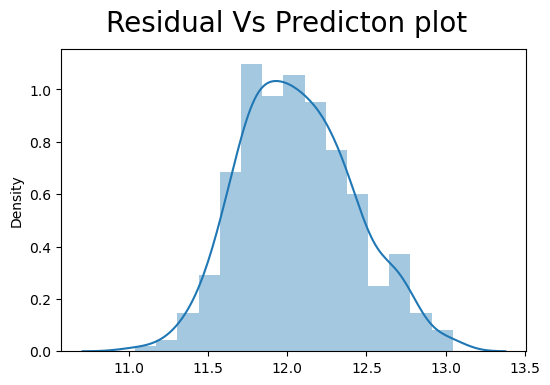

In [106]:
# Plotting Distribution of error for lasso regression.
fig = plt.figure(dpi=100)
P2 = sns.distplot(lasso_pred, kde=True)
fig.suptitle('Residual Vs Predicton plot', fontsize=20) 
plt.show()

In [107]:
betas = pd.DataFrame(index=X_train.columns)

In [108]:
betas['Linear'] = lm.coef_[0]
betas['Ridge']  = ridge.coef_[0]
betas['Lasso']  = lasso.coef_
betas.head(20)

,Linear,Ridge,Lasso
MSSubClass,-1.660474e-04,0.000507,-0.000000
LotFrontage,7.367777e-03,0.007967,0.007148
LotArea,2.303100e-02,0.021092,0.020097
OverallQual,6.521366e-02,0.076219,0.081747
OverallCond,3.875073e-02,0.040466,0.037987
YearRemodAdd,1.109639e-02,0.013280,0.014288
MasVnrArea,1.049883e-02,0.010826,0.008452
BsmtFinSF1,2.937701e+11,0.030743,0.027304
BsmtFinSF2,9.626673e+10,0.001637,0.000000
BsmtUnfSF,2.986299e+11,0.002682,-0.000000


#### Variables are significant in predicting the price of a house in Lasso Regression

In [109]:
betas.sort_values(by='Lasso', ascending=False).head(10)

,Linear,Ridge,Lasso
GrLivArea,-9.411936e+11,0.065205,0.116246
Neighborhood_StoneBr,9.443474e-02,0.085847,0.095084
Neighborhood_Crawfor,4.094315e-02,0.080476,0.087899
OverallQual,6.521366e-02,0.076219,0.081747
Neighborhood_NridgHt,1.589489e-02,0.046041,0.049961
Exterior1st_BrkFace,1.334081e-01,0.047875,0.039433
OverallCond,3.875073e-02,0.040466,0.037987
MSZoning_FV,4.740177e-01,0.046278,0.036891
TotalBsmtSF,-2.711217e+11,0.036847,0.036686
Foundation_PConc,5.664062e-02,0.038322,0.035617


#### Variables are significant in predicting the price of a house in Ridge Regression

In [110]:
betas.sort_values(by='Ridge', ascending=False).head(10)

,Linear,Ridge,Lasso
Neighborhood_StoneBr,9.443474e-02,0.085847,0.095084
Neighborhood_Crawfor,4.094315e-02,0.080476,0.087899
OverallQual,6.521366e-02,0.076219,0.081747
GrLivArea,-9.411936e+11,0.065205,0.116246
Exterior1st_BrkFace,1.334081e-01,0.047875,0.039433
MSZoning_FV,4.740177e-01,0.046278,0.036891
Neighborhood_NridgHt,1.589489e-02,0.046041,0.049961
1stFlrSF,7.295045e+11,0.040938,0.006302
OverallCond,3.875073e-02,0.040466,0.037987
Foundation_PConc,5.664062e-02,0.038322,0.035617


* How well those variables describe the price of a house.

#### Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

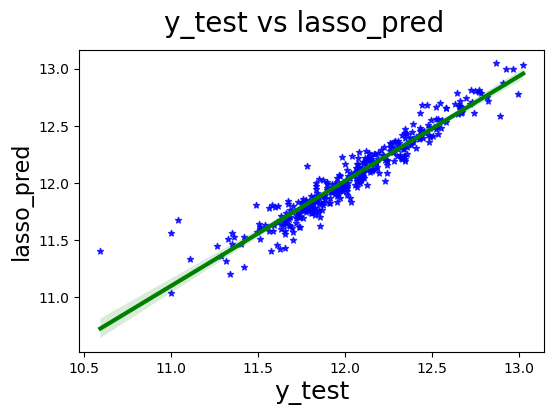

In [111]:
lasso_pred = lasso.predict(X_test)
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
sns.regplot(x=y_test,y=lasso_pred, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_test vs lasso_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

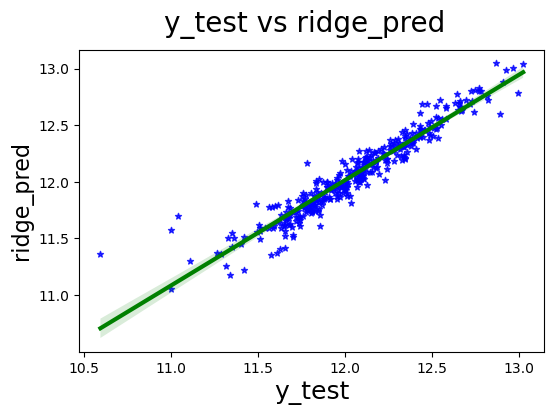

In [112]:
ridge_pred = ridge.predict(X_test)
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
sns.regplot(x=y_test,y=ridge_pred, scatter_kws = {"color": 'blue',"s": 20}, line_kws = {"color": 'green', "lw": 3}, marker='*')
fig.suptitle('y_test vs ridge_pred', fontsize=20)          
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

#### Determine the optimal value of lambda for ridge and lasso regression.

- alpha = 10 for Ridge Regression
- alpha = 0.001 for Lasso Regression

#### Create another model excluding the five most important predictor variables in Lasso. 
- Find five most important predictor variables

In [113]:
# Creating a list to hold the current top 5 important predictor variables in Lasso
top5_names = list(betas['Lasso'].sort_values(ascending=False).head(5).index)
top5_names

['GrLivArea',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'OverallQual',
 'Neighborhood_NridgHt']

In [114]:
# Drop the top 5 important predictor variables from X_train and X_test
X_train = X_train.drop(top5_names, axis=1)
X_test = X_test.drop(top5_names, axis=1)

In [115]:
print(X_train.shape)
print(X_test.shape)

(842, 117)
(361, 117)


In [116]:
lasso_New = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso_New, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# list pf alphas
alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]
def test_alpha_lasso(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train)
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print ('ALPHA: {:.4f} R2 SCORE: {:.4f}% new_score: {:.1f}' .format(a, new_score, new_mse))

for alpha in alphas:
    test_alpha_lasso(alpha)

ALPHA: 0.0001 R2 SCORE: 0.9125% new_score: 0.0
ALPHA: 0.0010 R2 SCORE: 0.9000% new_score: 0.0
ALPHA: 0.0100 R2 SCORE: 0.8852% new_score: 0.0
ALPHA: 0.1000 R2 SCORE: 0.6434% new_score: 0.0
ALPHA: 0.2000 R2 SCORE: 0.2627% new_score: 0.1
ALPHA: 0.3000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.4000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.5000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.6000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.7000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.8000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 0.9000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 1.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 2.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 3.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 4.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 5.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 6.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 7.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 8.0000 R2 SCORE: -0.0006% new_score: 0.1
ALPHA: 9.0000 R2 SCORE: -0.0006% new_score: 0

In [118]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.08869780265149556


In [119]:
alpha = 0.0001
lasso_New = Lasso(alpha=alpha)
lasso_New.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [120]:
data_lasso = pd.DataFrame(index=X_train.columns)
# data_lasso.rows = X_train.columns
data_lasso['Lasso_New'] = lasso_New.coef_
# data_lasso
data_lasso.head(20)

,Lasso_New
MSSubClass,0.000463
LotFrontage,0.009035
LotArea,0.016609
OverallCond,0.042553
YearRemodAdd,0.010470
MasVnrArea,0.013680
BsmtFinSF1,0.026972
BsmtFinSF2,-0.000000
BsmtUnfSF,0.000000
TotalBsmtSF,0.053329


In [121]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_New.predict(X_train)
y_pred_test = lasso_New.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print(r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print(r2_test_lasso)
metric3.append(r2_test_lasso)

rss_train_lasso = np.sum(np.square(y_train.squeeze() - y_pred_train))
print(rss_train_lasso)
metric3.append(rss_train_lasso)

rss_test_lasso = np.sum(np.square(y_test.squeeze() - y_pred_test))
print(rss_test_lasso)
metric3.append(rss_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print(mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print(mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

0.9269600889901131
0.9125393531312349
8.584848463867973
4.351485684897988
0.010195782023596167
0.012053976966476422


In [122]:
betas['Lasso_New']  = lasso_New.coef_[0]

In [123]:
betas.sort_values(by='Lasso_New', ascending=False).head(10)

,Linear,Ridge,Lasso,Lasso_New
MSSubClass,-1.660474e-04,0.000507,-0.000000,0.000463
Exterior1st_Plywood,4.700470e-02,-0.018705,-0.005509,0.000463
Exterior1st_ImStucc,-8.884249e+09,0.000000,0.000000,0.000463
Exterior1st_HdBoard,7.515430e-02,0.001157,-0.000000,0.000463
Exterior1st_CemntBd,2.267075e-02,-0.004315,-0.000000,0.000463
Exterior1st_CBlock,2.772441e+10,-0.009886,-0.000000,0.000463
Exterior1st_BrkFace,1.334081e-01,0.047875,0.039433,0.000463
Exterior1st_BrkComm,2.576213e-01,0.011973,0.000000,0.000463
RoofStyle_Shed,4.479187e-01,0.021753,0.000000,0.000463
RoofStyle_Mansard,2.326134e-01,0.021283,0.000000,0.000463


In [124]:
lasso_New.coef_

array([ 0.00046286,  0.00903482,  0.01660944,  0.04255254,  0.01047023,
        0.01367974,  0.02697235, -0.        ,  0.        ,  0.05332876,
        0.09754367,  0.11351651,  0.00462807,  0.0004979 ,  0.00920745,
        0.00967004,  0.00156527,  0.00654429,  0.01929737,  0.02848594,
        0.00530578,  0.01475109,  0.01039063,  0.0155166 ,  0.00262775,
       -0.00132681,  0.00217867,  0.00387752, -0.00239207,  0.02081857,
        0.00888782,  0.01155814,  0.00935102,  0.        , -0.00953309,
        0.        ,  0.0011798 ,  0.02092309,  0.03256417,  0.0138912 ,
        0.01195217,  0.00668201,  0.02372324,  0.00883477, -0.02109329,
        0.01098984,  0.00189426, -0.00918954,  0.00818354,  0.35767373,
        0.38924248,  0.34777964,  0.31084539, -0.07234994, -0.07571222,
       -0.07289243, -0.11436674, -0.10377443, -0.16606749, -0.11861517,
       -0.12601289, -0.31180497, -0.1352045 , -0.12964848, -0.01134908,
       -0.12652783, -0.07869769, -0.18891216, -0.10603316, -0.10